In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("ReidentificationTests.csv")

In [31]:
def filterData(df: pd.DataFrame, query: str) -> pd.DataFrame:
    return df.query(query, inplace = False)

def stringToLst(string: str) -> list:
    return list(
        map( lambda x: float(x)*100, string.split(","))
    )

def displayCMC(df: pd.DataFrame, title: str):
    print(title)
    probe_places = 'Ayagaures'
    gallery_places = 'Arucas'
    print("[ ### Probe: %s - Gallery: %s  ###]" %(probe_places, gallery_places))
    print(set(df['Identification_Model'][:]))
    for model in set(df['Identification_Model'][:]):
        df_model = filterData(df,
        'Identification_Model == "%s" and Probe_place == "%s" '
        'and Gallery_place == "%s"' % (model, probe_places, gallery_places))
        for index in range(len(df_model)):
            colum: pd.DataFrame = df_model.iloc[index]
            label: str = colum['Metric']
            cmc = stringToLst(colum['Values'])
            plt.plot(cmc, label = label)
            plt.xlabel("Posiciones de la calificación")
            plt.ylabel("Precisión (%)")
            plt.grid(True)
            plt.legend(loc='lower right')
            plt.title("model: %s | Probe: %s - Gallery: %s" %(model, probe_places, gallery_places))
        plt.show()
        print(model)
        print(df_model[['Metric', 'mAP']])

def plotCMC(df, query, title):
    dataFilter = filterData(df, query)
    displayCMC(dataFilter, title)

## RetinaFace

RetinaFace
[ ### Probe: Ayagaures - Gallery: Arucas  ###]
{'Facenet', 'OpenFace', 'DeepFace', 'VGG-Face'}


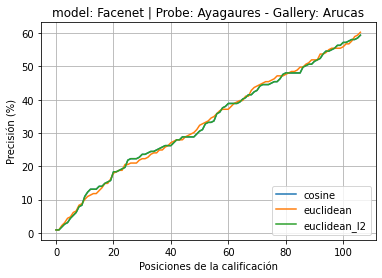

Facenet
           Metric       mAP
200        cosine  0.023062
201     euclidean  0.023450
202  euclidean_l2  0.023062


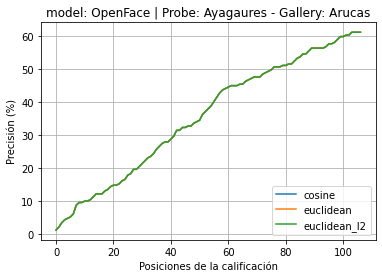

OpenFace
           Metric       mAP
203        cosine  0.025943
204     euclidean  0.025943
205  euclidean_l2  0.025943


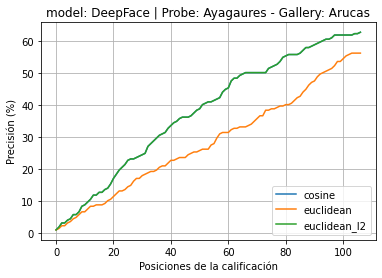

DeepFace
           Metric       mAP
206        cosine  0.026786
207     euclidean  0.025081
208  euclidean_l2  0.026786


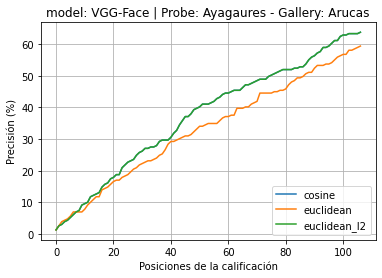

VGG-Face
           Metric       mAP
81         cosine  0.029696
99      euclidean  0.025061
118  euclidean_l2  0.029696


In [33]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace")

RetinaFace + recorte
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'Facenet', 'OpenFace', 'DeepFace', 'VGG-Face'}


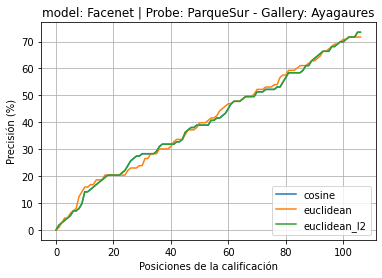

Facenet
           Metric       mAP
164        cosine  0.032129
165     euclidean  0.032026
166  euclidean_l2  0.032129


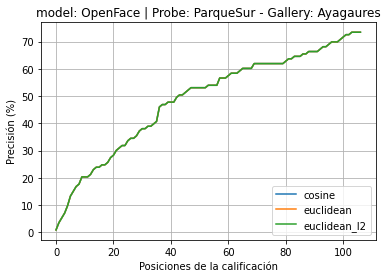

OpenFace
           Metric       mAP
167        cosine  0.048084
168     euclidean  0.048084
169  euclidean_l2  0.048084


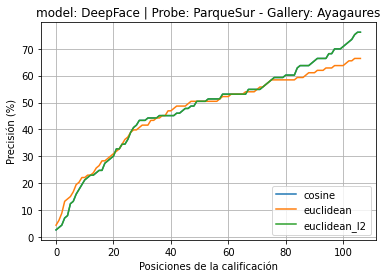

DeepFace
           Metric      mAP
191        cosine  0.06134
192     euclidean  0.07621
193  euclidean_l2  0.06134


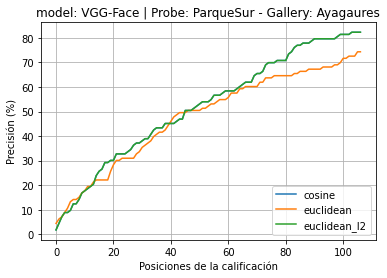

VGG-Face
           Metric       mAP
161        cosine  0.057173
162     euclidean  0.058810
163  euclidean_l2  0.057173


In [26]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte")

## Img2pose

Img2pose
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'Facenet', 'OpenFace', 'DeepFace', 'VGG-Face'}


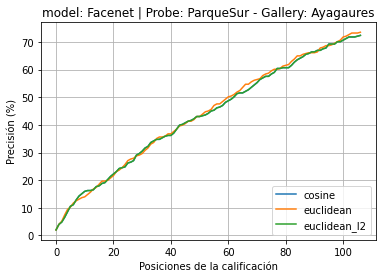

Facenet
           Metric       mAP
173        cosine  0.048316
174     euclidean  0.048644
175  euclidean_l2  0.048316


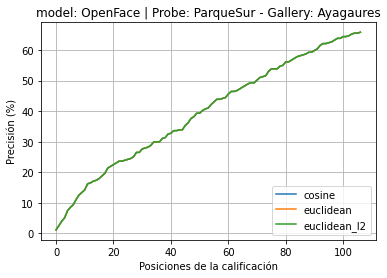

OpenFace
           Metric      mAP
176        cosine  0.04193
177     euclidean  0.04193
178  euclidean_l2  0.04193


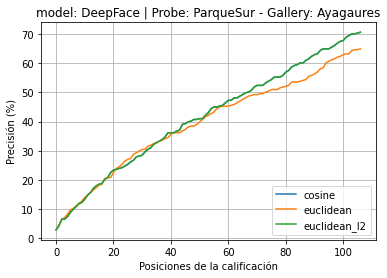

DeepFace
           Metric       mAP
194        cosine  0.047600
195     euclidean  0.047102
196  euclidean_l2  0.047667


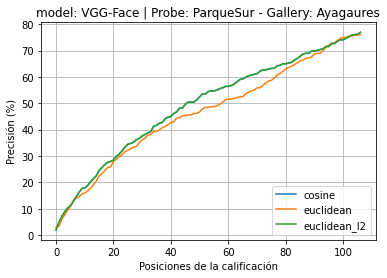

VGG-Face
           Metric       mAP
170        cosine  0.055467
171     euclidean  0.048899
172  euclidean_l2  0.055467


In [27]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose")

Img2pose + recorte de imagenes
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'Facenet', 'OpenFace', 'VGG-Face'}


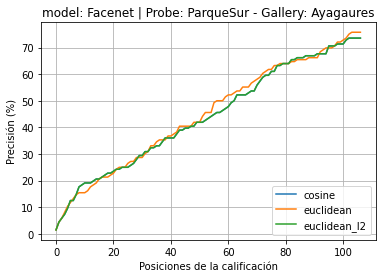

Facenet
           Metric       mAP
182        cosine  0.051394
183     euclidean  0.051122
184  euclidean_l2  0.051394


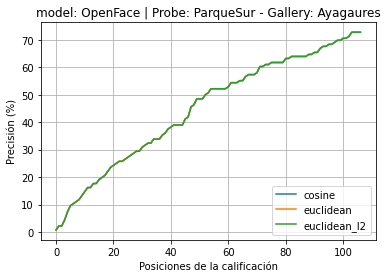

OpenFace
           Metric       mAP
185        cosine  0.041816
186     euclidean  0.041816
187  euclidean_l2  0.041816


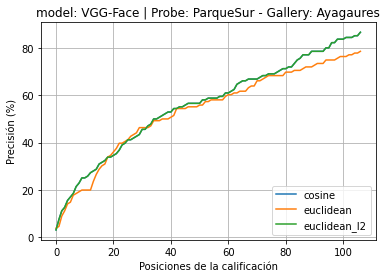

VGG-Face
           Metric       mAP
179        cosine  0.075071
180     euclidean  0.061801
181  euclidean_l2  0.075071


In [21]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes")

## Aligned

AlignedReId
[ ### Probe: Ayagaures - Gallery: Arucas  ###]
{'ResNet50'}


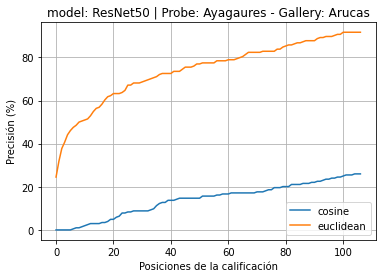

ResNet50
       Metric       mAP
9      cosine  0.012997
27  euclidean  0.223847


In [34]:
plotCMC(data, 'Face_Model == "AlignedReId"', "AlignedReId")

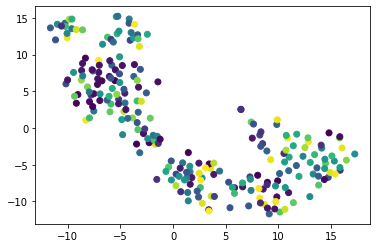

In [31]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
from Utils.fileUtils import getNumber
import os

def TSNE_plot(data, classes):
  X_embedded = TSNE(n_components=2).fit_transform(data)
  plt.scatter(X_embedded[:,0], X_embedded[:,1], c = classes)
  plt.show()

with open('../data/TGC_places/PresaDeHornos/representations_vgg_face.pkl', 'rb') as f:
    data = pickle.load(f)
embedding = np.array([a[1]  for a in data])
runners = [getNumber(os.path.basename(a[0])) for a in data]
TSNE_plot(embedding, runners)